In [48]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [49]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50

In [50]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "CompleteDatabase",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,

)

Found 22843 files belonging to 17 classes.


In [51]:
class_names= dataset.class_names
class_names

['Pepper Bell Bacterial Spot',
 'Pepper Bell Healthy',
 'Potato Early Blight',
 'Potato Healthy',
 'Potato Late Blight',
 'Raspberry Healthy',
 'Soybean Healthy',
 'Squash Powdery Mildew',
 'Strawberry Healthy',
 'Strawberry Leaf Scorch',
 'Tomato Bacterial Spot',
 'Tomato Early Blight',
 'Tomato Healthy',
 'Tomato Late Blight',
 'Tomato Leaf Mold',
 'Tomato Mosaic Virus',
 'Tomato Target Spot']

In [52]:
CLASSES = len(class_names)
CLASSES

17

In [53]:
len (dataset)


714

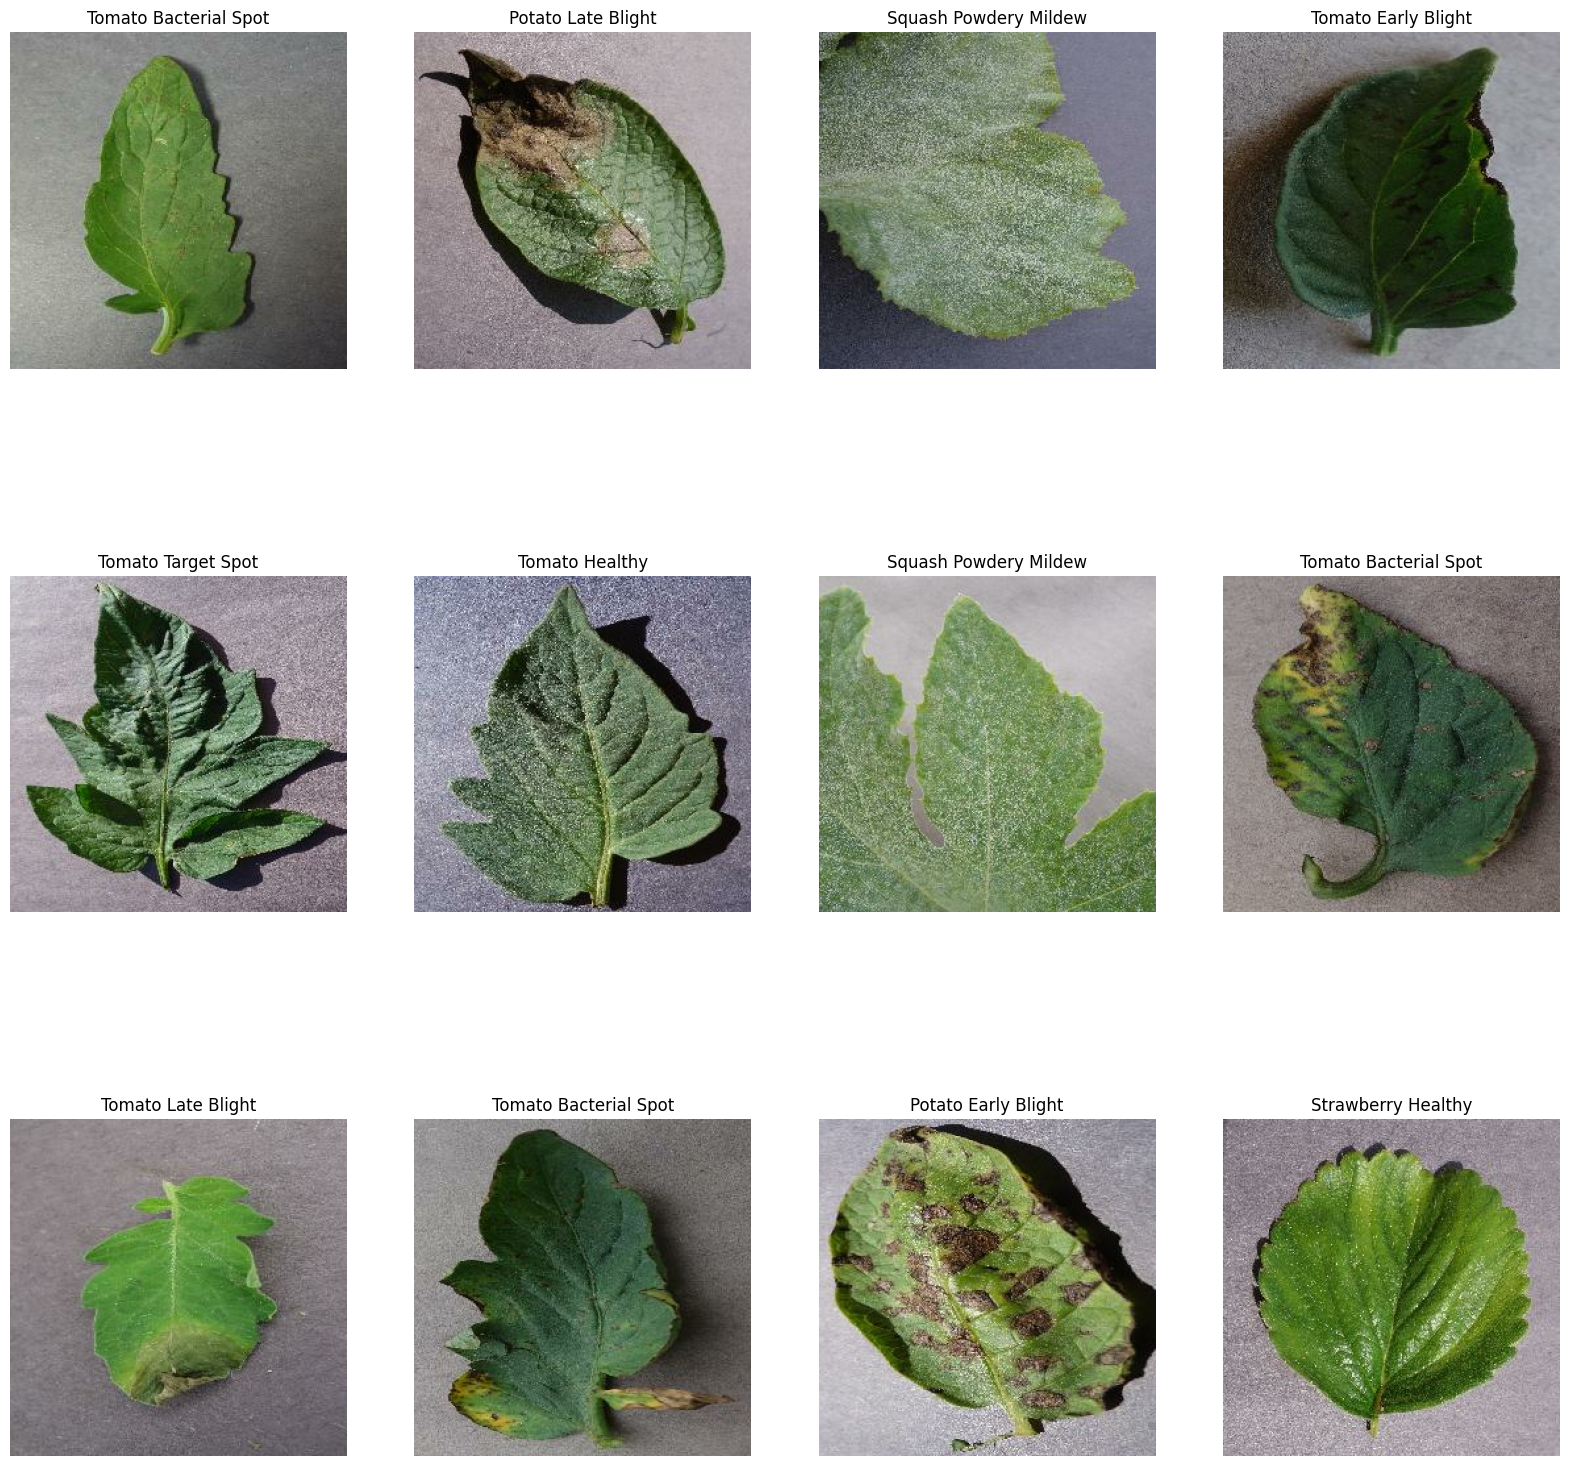

In [54]:
figure = plt.figure(figsize=(20, 20))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [55]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    train_ds = dataset.take(int(len(dataset)*train_split))
    trail_ds = dataset.skip(int(len(dataset)*train_split))
    val_ds = trail_ds.take(int(len(dataset)*test_split))
    test_ds = trail_ds.skip(int(len(dataset)*test_split))
    return train_ds, val_ds, test_ds

In [56]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [57]:
len(train_ds)

571

In [58]:
len(val_ds)

71

In [59]:
len(test_ds)

72

In [60]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [61]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255),
])

In [62]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [63]:
# Constants
IMAGE_SIZE = 256
CHANNELS = 3

n_classes = CLASSES

# Define input shape (without batch size)
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    layers.Input(shape=input_shape),  
    resize_and_rescale,  
    data_augmentation,   

    # Convolutional and Pooling layers
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=(None,IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 17)             │         1,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278,801 (1.06 MB)

 Trainable params: 278,801 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [65]:
history =model.fit(
    
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 421s 697ms/step - accuracy: 0.4050 - loss: 1.9175 - val_accuracy: 0.7232 - val_loss: 0.8258
Epoch 2/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 390s 683ms/step - accuracy: 0.7594 - loss: 0.7275 - val_accuracy: 0.7711 - val_loss: 0.7352
Epoch 3/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 396s 693ms/step - accuracy: 0.8259 - loss: 0.5195 - val_accuracy: 0.7623 - val_loss: 0.7816
Epoch 4/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 391s 685ms/step - accuracy: 0.8567 - loss: 0.4221 - val_accuracy: 0.8860 - val_loss: 0.3244
Epoch 5/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 394s 690ms/step - accuracy: 0.8817 - loss: 0.3565 - val_accuracy: 0.9010 - val_loss: 0.2784
Epoch 6/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 402s 704ms/step - accuracy: 0.8979 - loss: 0.3130 - val_accuracy: 0.8666 - val_loss: 0.3575
Epoch 7/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 395s 691ms/step - accuracy: 0.9026 - loss: 0.2860 - val_accuracy: 0.8895 - val_loss: 0.3183
Epoch 8/50
571/571 ━━━━━━━━━━━━━━━━━━━━ 398s 697ms/step - accuracy: 0.9211 -

In [66]:
scores=model.evaluate(test_ds)
scores

72/72 ━━━━━━━━━━━━━━━━━━━━ 18s 157ms/step - accuracy: 0.9507 - loss: 0.2103


[0.3915826976299286, 0.9530230760574341]

In [67]:
history.history['val_loss']

[0.8258251547813416,
 0.7351587414741516,
 0.7816438674926758,
 0.3243939280509949,
 0.2784320116043091,
 0.35747578740119934,
 0.3182644248008728,
 0.22628848254680634,
 0.20414017140865326,
 0.19490472972393036,
 0.27044442296028137,
 0.24511662125587463,
 0.17169387638568878,
 0.1165371984243393,
 0.15356749296188354,
 0.1685667783021927,
 0.16496649384498596,
 0.10618999600410461,
 0.15432389080524445,
 0.13927286863327026,
 0.23799888789653778,
 0.11155256628990173,
 0.15602409839630127,
 0.17458584904670715,
 0.1081923246383667,
 0.1562691330909729,
 0.12113688141107559,
 0.08076337724924088,
 0.10334216803312302,
 0.08315171301364899,
 0.12976935505867004,
 0.1346088945865631,
 0.1090695932507515,
 0.28970104455947876,
 0.10845689475536346,
 0.1056663990020752,
 0.15254604816436768,
 0.15892727673053741,
 0.10587600618600845,
 0.07717844098806381,
 0.10103752464056015,
 0.2855934202671051,
 0.18908609449863434,
 0.09349440783262253,
 0.08557173609733582,
 0.15582390129566193,
 0

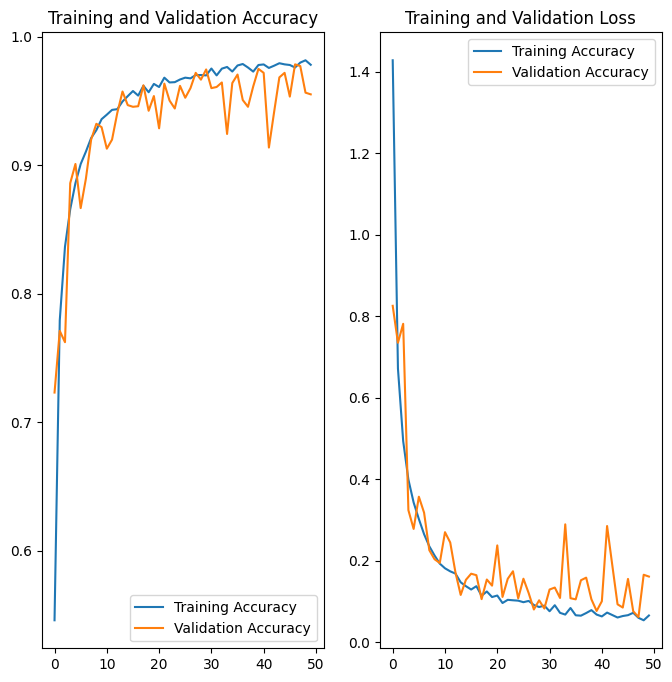

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Accuracy')
plt.plot(range(EPOCHS), val_loss, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: Strawberry Leaf Scorch
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
predicted label: Strawberry Leaf Scorch


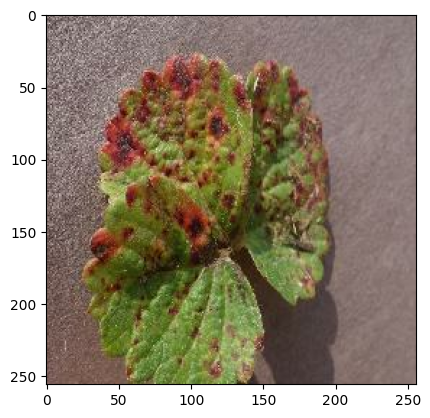

In [69]:
import numpy as np

for images_batch, label_batch in val_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [70]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


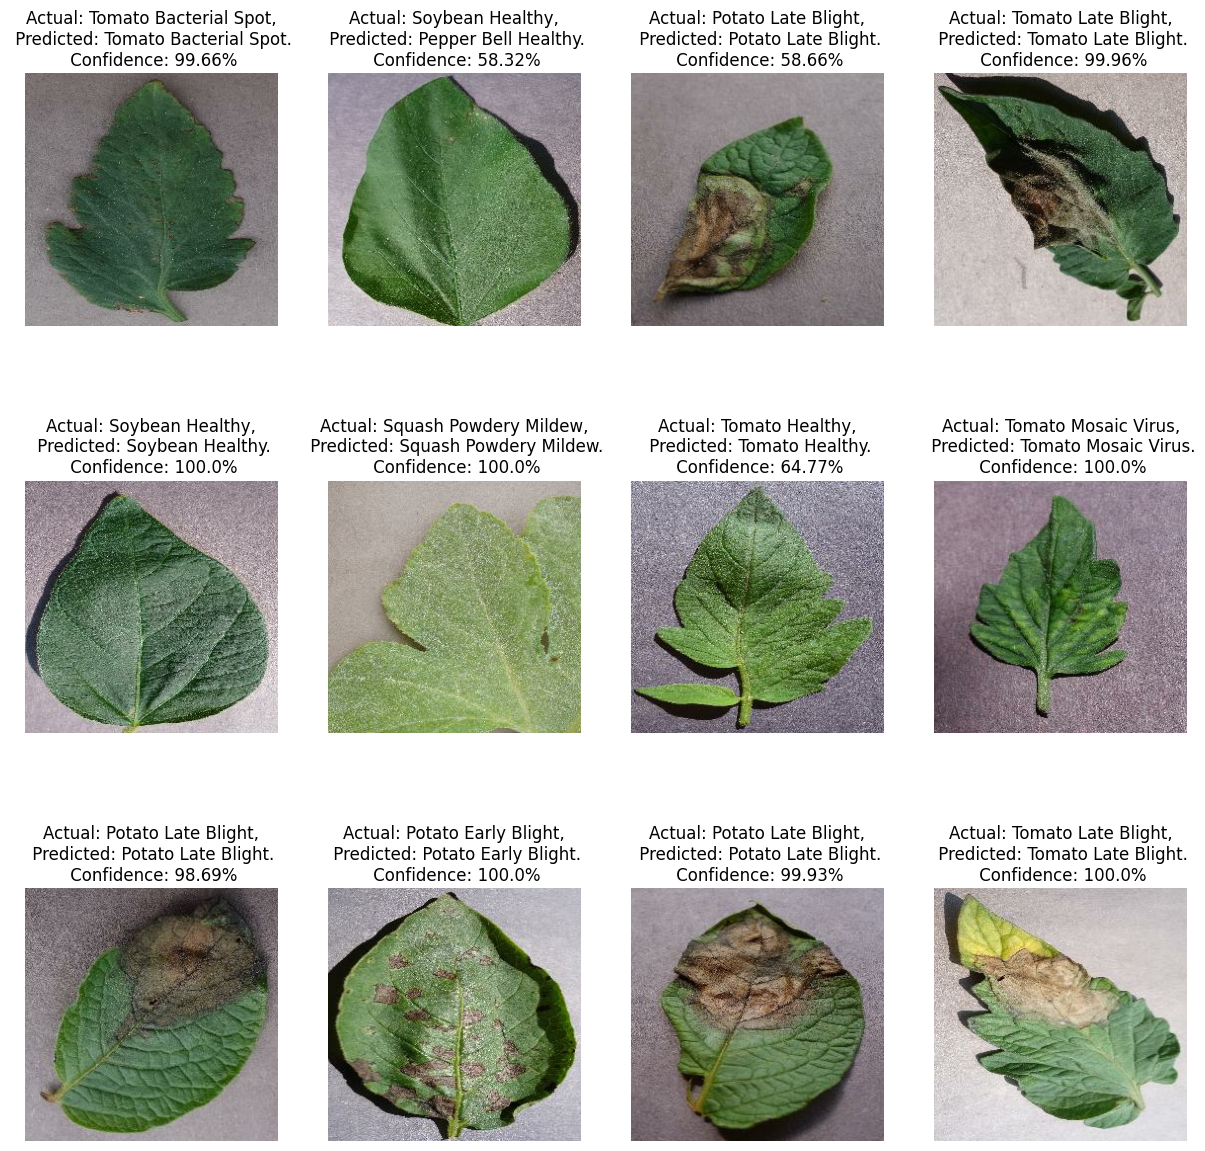

In [71]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        
        plt.axis("off")


In [72]:
import os
model_version =max([int(i) for i in os.listdir("./models") + [0]]) + 1

model.export(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/5\assets


INFO:tensorflow:Assets written to: ./models/5\assets


Saved artifact at './models/5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_74')
Output Type:
  TensorSpec(shape=(None, 17), dtype=tf.float32, name=None)
Captures:
  1801305805968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801305806352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801305806928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801305807312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801305807504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801305808464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801305808656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801305809232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801305809424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801305810000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1801305810192: TensorSpec(shape=(), 